In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('Final_ADS.csv')
df = data.copy()

In [3]:
df.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,5.148657,0.000000,0.00000,5.148657,5.148657,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,5.148657,0.000000,0.000000,1,16,16
1,5194,1.0,6.397263,0.000000,0.00000,6.397263,6.397263,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,6.397263,0.000000,0.000000,0.000000,1,10,10
2,5398,2.0,4.641695,0.000000,0.00000,3.958143,3.958143,0.0,1.0,0.0,...,3.958143,0.000000,0.000000,3.958143,0.000000,3.958143,0.000000,0,26,12
3,6930,6.0,6.397263,3.582019,7.10843,5.148657,4.461300,1.0,2.0,1.0,...,4.461300,0.000000,4.461300,5.148657,4.461300,4.461300,0.000000,0,24,4
4,7260,14.0,7.585687,3.988061,7.93906,5.552184,4.241039,4.0,3.0,4.0,...,4.461300,5.148657,5.148657,5.148657,5.552184,5.148657,5.148657,0,30,0


In [4]:
x = df.drop(['CUSTOMER_ID','CHURN'],axis=1)

In [5]:
x.shape

(200000, 38)

In [6]:
y = df[['CHURN']]

In [7]:
y.shape

(200000, 1)

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
print(xtrain.shape,ytrain.shape)

(140000, 38) (140000, 1)


In [10]:
print(xtest.shape,ytest.shape)

(60000, 38) (60000, 1)


In [11]:
model=LogisticRegression(random_state=42)

In [12]:
model.fit(xtrain,ytrain)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [13]:
pred=model.predict(xtest)
predpro = model.predict_proba(xtest)[:,1]

In [14]:
pred[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [15]:
ytest[:5]

,CHURN
119737,1
72272,0
158154,1
65426,0
30074,0


In [16]:
evaluation=xtest.copy()

In [17]:
evaluation.head()

,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,...,W3_MIN_SALESAMOUNT,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,FIRST_VISIT_DAY,LAST_VISIT_DAY
119737,2.0,5.552184,4.119498,8.206496,5.148657,4.461300,0.0,0.0,0.0,0.0,...,0.000000,0.000000,4.461300,0.0000,0.000000,0.000000,0.000000,5.148657,32,31
72272,14.0,7.223004,3.468373,6.874452,5.148657,4.461300,2.0,4.0,4.0,3.0,...,4.461300,4.461300,5.148657,4.4613,4.461300,5.148657,4.461300,5.148657,29,2
158154,1.0,4.461300,0.000000,0.000000,4.461300,4.461300,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,4.461300,0.000000,0.000000,0.000000,12,12
65426,4.0,6.625764,5.616480,11.225686,6.397263,3.958143,0.0,2.0,1.0,1.0,...,3.958143,3.958143,0.000000,0.0000,6.397263,3.958143,3.958143,0.000000,21,10
30074,1.0,5.148657,0.000000,0.000000,5.148657,5.148657,0.0,0.0,0.0,1.0,...,0.000000,5.148657,0.000000,0.0000,0.000000,0.000000,5.148657,0.000000,22,22


In [18]:
evaluation['Actual']=ytest

In [19]:
evaluation['Predicted']=pred

In [20]:
evaluation.head(10)

,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,...,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,FIRST_VISIT_DAY,LAST_VISIT_DAY,Actual,Predicted
119737,2.0,5.552184,4.119498,8.206496,5.148657,4.461300,0.0,0.0,0.0,0.0,...,4.461300,0.000000,0.000000,0.000000,0.000000,5.148657,32,31,1,1
72272,14.0,7.223004,3.468373,6.874452,5.148657,4.461300,2.0,4.0,4.0,3.0,...,5.148657,4.461300,4.461300,5.148657,4.461300,5.148657,29,2,0,0
158154,1.0,4.461300,0.000000,0.000000,4.461300,4.461300,0.0,1.0,0.0,0.0,...,0.000000,0.000000,4.461300,0.000000,0.000000,0.000000,12,12,1,1
65426,4.0,6.625764,5.616480,11.225686,6.397263,3.958143,0.0,2.0,1.0,1.0,...,0.000000,0.000000,6.397263,3.958143,3.958143,0.000000,21,10,0,1
30074,1.0,5.148657,0.000000,0.000000,5.148657,5.148657,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,5.148657,0.000000,22,22,0,1
23677,13.0,7.669028,3.208469,6.336194,5.148657,4.461300,3.0,3.0,3.0,2.0,...,5.148657,5.148657,5.148657,5.148657,5.148657,5.148657,32,1,0,0
134858,4.0,5.933941,3.786106,7.526860,5.043941,3.958143,1.0,0.0,1.0,1.0,...,4.461300,4.461300,0.000000,5.043941,3.958143,4.461300,28,5,0,0
176418,3.0,5.483468,2.387316,4.592066,4.461300,4.241039,2.0,0.0,0.0,0.0,...,4.241039,4.461300,0.000000,0.000000,0.000000,4.241039,30,1,1,1
132467,2.0,4.794467,2.573045,4.994148,4.241039,3.958143,0.0,1.0,1.0,0.0,...,0.000000,0.000000,3.958143,4.241039,0.000000,0.000000,15,10,1,1
4082,14.0,7.676993,4.117982,8.203415,5.676891,3.958143,2.0,4.0,4.0,3.0,...,5.148657,5.676891,5.148657,5.148657,5.148657,5.148657,31,1,0,0


In [21]:
evaluation[evaluation['Actual']==evaluation['Predicted']].shape

(44067, 40)

In [22]:
evaluation.shape

(60000, 40)

In [23]:
44241/60000

0.73735

In [24]:
print('Test Accuracy:',accuracy_score(ytest,pred))

Test Accuracy: 0.73445


In [25]:
pred_train=model.predict(xtrain)

In [26]:
print('Train Accuracy:',accuracy_score(ytrain,pred_train))

Train Accuracy: 0.7326928571428571


# Confusion Matrix

In [27]:
confusion_matrix(ytest, pred)

array([[24063,  8929],
       [ 7004, 20004]], dtype=int64)

In [28]:
confusion_matrix(ytest, pred).ravel()

array([24063,  8929,  7004, 20004], dtype=int64)

In [29]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix=pd.DataFrame({"pred_Not Churn":[tn,fn],"pred_Churn":[fp,tp]},index=["Not Churn","Churn"])
conf_matrix

,pred_Not Churn,pred_Churn
Not Churn,24063,8929
Churn,7004,20004


In [30]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.73445


In [31]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.73445


In [32]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.6913904538070715
Precision for 0: 0.7745517751955451


In [33]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.6913904538070715


In [34]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.7406694312796208
Recall for 0: 0.7293586323957323


In [35]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.7406694312796208


In [36]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.7151820668204001
F1 Score for 0: 0.7512761672832857


In [37]:
f1_lr=f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.7151820668204001


In [38]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     32992
           1       0.69      0.74      0.72     27008

    accuracy                           0.73     60000
   macro avg       0.73      0.74      0.73     60000
weighted avg       0.74      0.73      0.74     60000



In [39]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [40]:
tpr, fpr

(0.7406694312796208, 0.2706413676042677)

In [41]:
fpr = 1 - recall_0
tpr, fpr

(0.7406694312796208, 0.2706413676042677)

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [43]:
fpr,tpr,threshold=roc_curve(ytest,predpro)

In [44]:
auc_lr=roc_auc_score(ytest,predpro)
auc_lr

0.8028630078101657

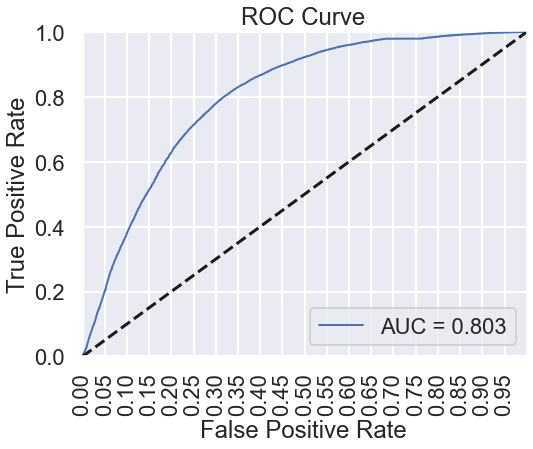

In [45]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

# Decision tree

In [46]:
np.random.seed(25)
import random
random.seed(25)

In [47]:
df_OneHot=pd.get_dummies(df)

In [48]:
df_OneHot.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,5.148657,0.000000,0.00000,5.148657,5.148657,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,5.148657,0.000000,0.000000,1,16,16
1,5194,1.0,6.397263,0.000000,0.00000,6.397263,6.397263,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,6.397263,0.000000,0.000000,0.000000,1,10,10
2,5398,2.0,4.641695,0.000000,0.00000,3.958143,3.958143,0.0,1.0,0.0,...,3.958143,0.000000,0.000000,3.958143,0.000000,3.958143,0.000000,0,26,12
3,6930,6.0,6.397263,3.582019,7.10843,5.148657,4.461300,1.0,2.0,1.0,...,4.461300,0.000000,4.461300,5.148657,4.461300,4.461300,0.000000,0,24,4
4,7260,14.0,7.585687,3.988061,7.93906,5.552184,4.241039,4.0,3.0,4.0,...,4.461300,5.148657,5.148657,5.148657,5.552184,5.148657,5.148657,0,30,0


In [49]:
df=df_OneHot.copy()

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [51]:
X = df.drop(['CHURN','CUSTOMER_ID'], axis=1)
Y = df['CHURN']

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(140000, 38) (140000,)
(60000, 38) (60000,)


In [53]:
clf_dt = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [54]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [55]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

In [56]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.7281833333333333


In [57]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76     33213
           1       0.72      0.64      0.68     26787

    accuracy                           0.73     60000
   macro avg       0.73      0.72      0.72     60000
weighted avg       0.73      0.73      0.73     60000



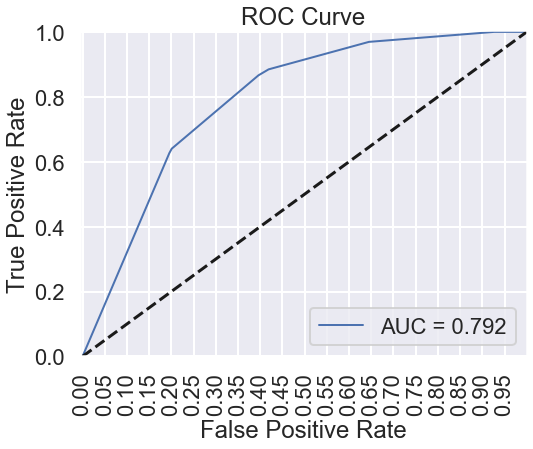

In [58]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

In [59]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["Path"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
Image(graph.create_png())

In [ ]:
clf_dt.feature_importances_

In [ ]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [ ]:
features_tuple

In [ ]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [ ]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")

# 3. Random Forest

In [ ]:
X = df.drop(['CHURN','CUSTOMER_ID'], axis=1)
Y = df['CHURN']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

In [ ]:
clf_rf = RandomForestClassifier(max_depth=4)

In [ ]:
clf_rf.fit(xtrain, ytrain)

In [ ]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb=clf_rf.predict_proba(xtest)[:,1]

In [ ]:
accuracy_rf = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_rf))

In [ ]:
print(classification_report(ytest,rf_pred))

In [ ]:
auc_rf=roc_auc_score(ytest,rf_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

In [ ]:
dot_data = StringIO()

In [ ]:
tree = clf_rf.estimators_[9]

In [ ]:
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
Image(graph.create_png())

In [ ]:
features_tuple=list(zip(X.columns,clf_rf.feature_importances_))

In [ ]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [ ]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

### Hyperparameter Tuning using GridSearchCV

In [ ]:
param_grid1 = {"n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier()
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='roc_auc',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

RF_cv1.cv_results_, RF_cv1.best_params_, RF_cv1.best_score_

In [ ]:
param_grid2 = {"n_estimators" : [67,68,69,70,71,72,73],
           "max_depth" : [7,8,9,10,11,12,13],
           "min_samples_leaf" : [1,2,3]}

RF = RandomForestClassifier()
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5,scoring='roc_auc',n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain,ytrain)

RF_cv2.cv_results_, RF_cv2.best_params_, RF_cv2.best_score_

### Tuned Random Forest

Hence final parameters are:

* n_estimators = 70
* min_sample_leaf = 3
* max_depth = 12

In [ ]:
RF_tuned = RandomForestClassifier(max_depth=12, min_samples_leaf=3, n_estimators=70)

In [ ]:
RF_tuned.fit(xtrain, ytrain)

In [ ]:
rf_pred_t = RF_tuned.predict(xtest)
rf_pred_prb_t=RF_tuned.predict_proba(xtest)[:,1]

In [ ]:
accuracy_rf_t = accuracy_score(ytest,rf_pred_t)
print("Accuracy affter tuning: {}".format(accuracy_rf_t))

In [ ]:
print(classification_report(ytest,rf_pred_t))

In [ ]:
auc_rf_t=roc_auc_score(ytest,rf_pred_prb_t)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC Tuned = %0.3f'% auc_rf_t)

In [ ]:
RF_dict = {"Algorithm":["Random Forest","Random Forest"],"Action":["First Run","Tuned"],
           "Accuracy":[accuracy_rf,accuracy_rf_t],"AUC":[auc_rf,auc_rf_t]}

In [ ]:
comparison=pd.DataFrame(RF_dict)
comparison

In [ ]:
print("Difference in Accuracy is: %0.3f"%((comparison.loc[1,'Accuracy']-comparison.loc[0,'Accuracy'])*100))
print("Difference in AUC is: %0.3f"%((comparison.loc[1,'AUC']-comparison.loc[0,'AUC'])*100))

# 5. XGBoost

In [ ]:
X = df.drop(['CHURN','CUSTOMER_ID'], axis=1)
Y = df['CHURN']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1)

In [ ]:
clf_xgb.fit(xtrain, ytrain)

In [ ]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

In [ ]:
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))

In [ ]:
print(classification_report(ytest,xgb_pred))

In [ ]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

In [ ]:
dtrain = xgb.DMatrix(data=xtrain, label=ytrain)

In [ ]:
xgb_param=clf_xgb.get_params()

In [ ]:
cv_result=xgb.cv(xgb_param,dtrain,num_boost_round=200,nfold=5,metrics={'auc'},early_stopping_rounds=10,seed=25)

In [ ]:
cv_result

### Hyperparameters Tunung using GridSearchCV

In [ ]:
def modelfit(alg, dtrain, xtrain, xtest, ytrain, ytest,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param=alg.get_params()
        cv_result=xgb.cv(xgb_param,dtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cv_folds,metrics={'auc'},
                     early_stopping_rounds=early_stopping_rounds,seed=25)
        alg.set_params(n_estimators=cv_result.shape[0])
        print("n_estimators : ",alg.get_params()['n_estimators'])
    
    #fit algorithm on data
    alg.fit(xtrain,ytrain)
    pred=alg.predict(xtest)
    predprob=alg.predict_proba(xtest)[:,1]
    
    print ("\nModel Report")
    print ("Accuracy(Test) : %.4g" % accuracy_score(ytest, pred))
    print ("AUC Score(Test) : %f" % roc_auc_score(ytest, predprob))

In [ ]:
xgb1=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 seed=25)

In [ ]:
modelfit(xgb1,dtrain, xtrain, xtest,ytrain,ytest)

**Tune max_depth and min_child_weight**

In [ ]:
param_test1 = {
 'max_depth':range(3,15,2),
 'min_child_weight':range(0,9,2)
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(xtrain,ytrain)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test1 = {
 'max_depth':[4,5,6],
 'min_child_weight':[3,4,5]
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(xtrain,ytrain)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

 So, optimum value of **max_depth is 5** and **min_child_weight is 4**

**Tune gamma**

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,9)]
}

gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=42), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch3.fit(xtrain,ytrain)

gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

So gamma optimum value which is **0.5**

Before proceeding, a good idea would be to re-calibrate the number of boosting rounds for the updated parameters.

In [ ]:
xgb2=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=4,
 gamma=0.5,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 seed=25)

In [ ]:
modelfit(xgb1,dtrain, xtrain, xtest,ytrain,ytest)

**Tune subsample and colsample_bytree**

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(5,11)],
 'colsample_bytree':[i/10.0 for i in range(5,11)]
}

gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=4, gamma=0.5, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4.fit(xtrain,ytrain)

gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(45,75,5)],
 'colsample_bytree':[i/100.0 for i in range(100,105,5)]
}

gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=4, gamma=0.5, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch5.fit(xtrain,ytrain)

gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

Thus the optimum values are:

* subsample: 0.7 
* colsample_bytree: 1

**Tuning Regularization Parameters**

In [ ]:
param_test6 = {
 'reg_alpha':[0.1, 1, 2,0,5,10,20,50,100]
}

gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=4, gamma=0.5, subsample=0.7, colsample_bytree=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(xtrain,ytrain)

gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

In [ ]:
param_test6 = {
 'reg_alpha':[7,8,9,10,11,12,13]
}

gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=4, gamma=0.5, subsample=0.7, colsample_bytree=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(xtrain,ytrain)

gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

In [ ]:
param_test6 = {
 'reg_alpha':[10.5,11,11.5]
}

gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=171, max_depth=5,
 min_child_weight=4, gamma=0.5, subsample=0.7, colsample_bytree=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=25), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(xtrain,ytrain)

gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

**Reducing Learning Rate**

In [ ]:
xgb3=xgb.XGBClassifier(learning_rate = 0.02,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=4,
 gamma=0.5,
 subsample=0.7,
 colsample_bytree=1,
 reg_alpha=11,
 objective= 'binary:logistic',
 nthread=4,
 seed=25)

In [ ]:
modelfit(xgb3,dtrain, xtrain, xtest, ytrain, ytest)

In [ ]:
xgb3=xgb.XGBClassifier(learning_rate = 0.03,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=4,
 gamma=0.5,
 subsample=0.7,
 colsample_bytree=1,
 reg_alpha=11,
 objective= 'binary:logistic',
 nthread=4,
 seed=25)

In [ ]:
modelfit(xgb3,dtrain, xtrain, xtest, ytrain, ytest)

### Tuned XGBoost

Hence final parameters are:

* n_estimators = 671
* learning rate = 0.03
* max_depth = 5
* min_child_weight = 4
* gamma = 0.5
* subsample = 0.7
* colsample_bytree = 1
* reg_alpha = 11

In [ ]:
xgb4=xgb.XGBClassifier(learning_rate =0.03,
 n_estimators=671,
 max_depth=5,
 min_child_weight=4,
 gamma=0.5,
 subsample=0.7,
 colsample_bytree=1,
 reg_alpha=11,
 objective= 'binary:logistic',
 nthread=4,
 seed=100)

In [ ]:
xgb4.fit(xtrain, ytrain)

In [ ]:
xgb_pred_t = xgb4.predict(xtest)
xgb_pred_prb_t = xgb4.predict_proba(xtest)[:,1]

In [ ]:
accuracy_xgb_t = accuracy_score(ytest,xgb_pred_t)
print("Accuracy: {}".format(accuracy_xgb_t))

In [ ]:
print(classification_report(ytest,xgb_pred_t))

In [ ]:
auc_xgb_t=roc_auc_score(ytest,xgb_pred_prb_t)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb_t)

In [ ]:
RF_dict = {"Model Name":["Logistic Regression",'Decision Tree',"Random Forest",'Random Forest Tuned','XGBoot','XGBoost Tuned'],
           "Accuracy":[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_rf_t,accuracy_xgb,accuracy_xgb_t],
           "AUC":[auc_lr,auc_dt,auc_rf,auc_rf_t,auc_xgb,auc_xgb_t]}
comparison=pd.DataFrame(RF_dict)
comparison

In [ ]:
comparison.sort_values(by=['AUC'],ascending=False)